This will be a file to create a new model.
Train, save monitor, create copy network, print out some reward graphs. 
Then, turn this into a function to go in convert_net.py 

In [1]:
import gymnasium as gym
import foraging_envs
from convert_net import *

env_dict = {
    "env_name": "foraging_envs/foraging-three",
    "episode_length": 5000,
    "flower_distribution": "uniform",
    "decay_parameter": 0.25,
    "travel_time": 4,
    "render_mode": "human",
}

create_model(env_dict, "DQN", [64, 64], nn.ReLU, 2000, "Tube_SaveEnv")

# maybe add option to manually pass in a name 
# include info about what is changing / travel time for next iteration
# include trial number 

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Saved Models/foraging_three/DQNPolicy_Tube_SaveEnv/
Eval num_timesteps=500, episode_reward=430.68 +/- 32.81
Episode length: 5000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 5e+03    |
|    mean_reward      | 431      |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 500      |
----------------------------------
New best mean reward!
Eval num_timesteps=1000, episode_reward=427.11 +/- 33.02
Episode length: 5000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 5e+03    |
|    mean_reward      | 427      |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 1000     |
----------------------------------
Eval num_tim

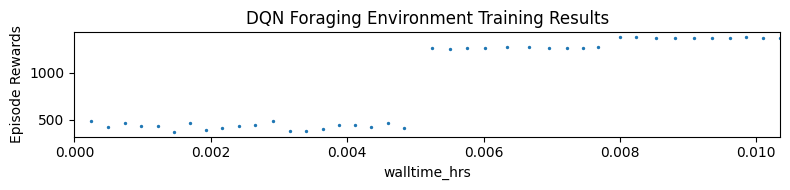

In [2]:
# use the saved model 

from  stable_baselines3.common import results_plotter

folder_main = r"C:\Users\nicla\OneDrive\Documents\Reinforcement Learning\Foraging Project\Saved Models\foraging_three\DQNPolicy_Tube_SaveEnv"

results_plotter.plot_results(
    [folder_main], 200000, results_plotter.X_WALLTIME, "DQN Foraging Environment Training Results"
)



In [13]:



# to plot the results from the best model, load the saved model and let it run for awhile 
folder_main = r"C:\Users\nicla\OneDrive\Documents\Reinforcement Learning\Foraging Project\Saved Models\foraging_three\DQNPolicy_Tube_SaveEnv"

model = DQN.load(folder_main + "/generic_save.zip", include  = "env")
env = model.get_env()
obs = env.reset()
rewards = []

for _ in range(1000):
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
    if done:
        obs = env.reset()
    rewards.append(reward)
 



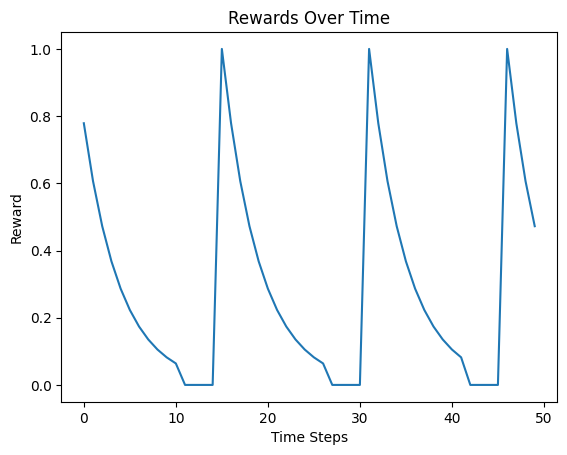

In [18]:
# plot rewards 

import matplotlib.pyplot as plt
plt.plot(rewards[0:50])

plt.title("Rewards Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Reward")
plt.show()
